In [6]:
import os, yaml, sys
import numpy as np
import matplotlib.pyplot as plt
import pickle
import cv2
from scipy.stats import zscore
from IPython.display import clear_output
%matplotlib inline

ENV = os.getenv("MY_ENV", "dev")
with open("../../config.yaml", "r") as f:
    config = yaml.safe_load(f)
paths = config[ENV]["paths"]
sys.path.append(paths["src_path"])
from general_utils.utils import autocorr_mat, get_lagplot
from neural_utils.utils import load_monkey_data
from data_preprocessing.preprocessing import min_max_normalization
from image_processing.utils import read_video

In [7]:
# parameters to tweak
monkey_name = "louie"; 
day = 19; 
month = "sep"; 
resolution_Hz = 100
npx = True
imec_n = 0
data, gaze_data = load_monkey_data(paths, monkey_name, day, month, resolution_Hz, npx=npx, imec_n=imec_n)

In [8]:
stimuli_names = list(data.keys())
print(len(stimuli_names), stimuli_names)

9 ['stevetoB5.mp4', 'stevetoalle.mp4', 'steve1toBluehat_rev.mp4', 'steve1toBlondie_rev.mp4', 'steve1toB5_rev.mp4', 'stevetobluehat.mp4', 'steve1toAlle_rev.mp4', 'stevetoblondie.mp4', 'steve1_rev.mp4']


In [9]:
data_norm = min_max_normalization(data)

Text(0.5, 0, 'timepoints')

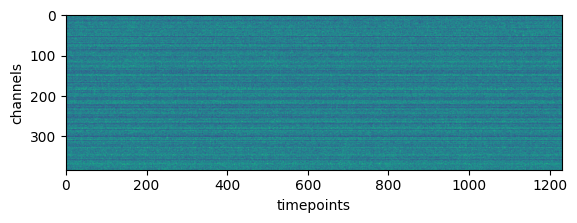

In [10]:
plt.imshow(np.mean(data_norm[stimuli_names[0]], axis=2), aspect=1, cmap='viridis')
plt.ylabel("channels"); plt.xlabel("timepoints")

Text(0.5, 0, 'timepoints')

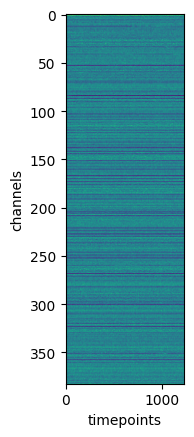

In [11]:
plt.imshow(np.mean(data_norm[stimuli_names[0]], axis=2), aspect=10, cmap='viridis')
plt.ylabel("channels"); plt.xlabel("timepoints")

Text(0.5, 0, 'timepoints')

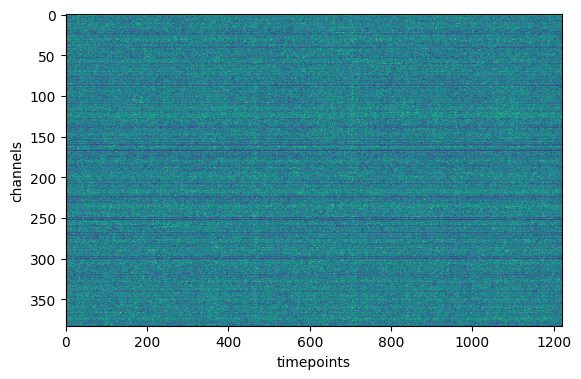

In [12]:
curr_data = data[stimuli_names[8]][:,:,0]
data_normalized_per_row = (curr_data - curr_data.min(axis=1, keepdims=True)) / (curr_data.max(axis=1, keepdims=True) - curr_data.min(axis=1, keepdims=True))
plt.imshow(data_normalized_per_row, aspect=2, cmap='viridis')
plt.ylabel("channels"); plt.xlabel("timepoints")

Text(0.5, 0, 'timepoints')

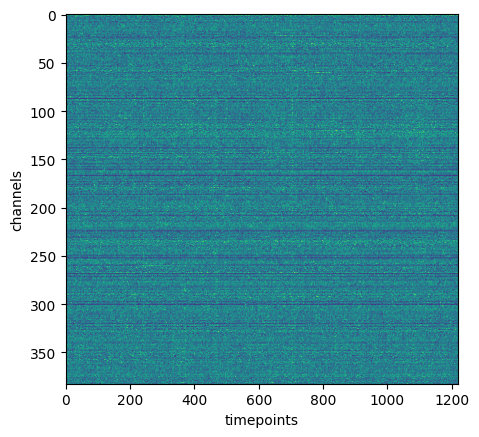

In [13]:
# plt.imshow(zscore(data[stimuli_names[0]][:,:,0], axis=1), aspect=3, cmap='viridis')
plt.imshow(data_normalized_per_row, aspect=3, cmap='viridis')
plt.ylabel("channels"); plt.xlabel("timepoints")

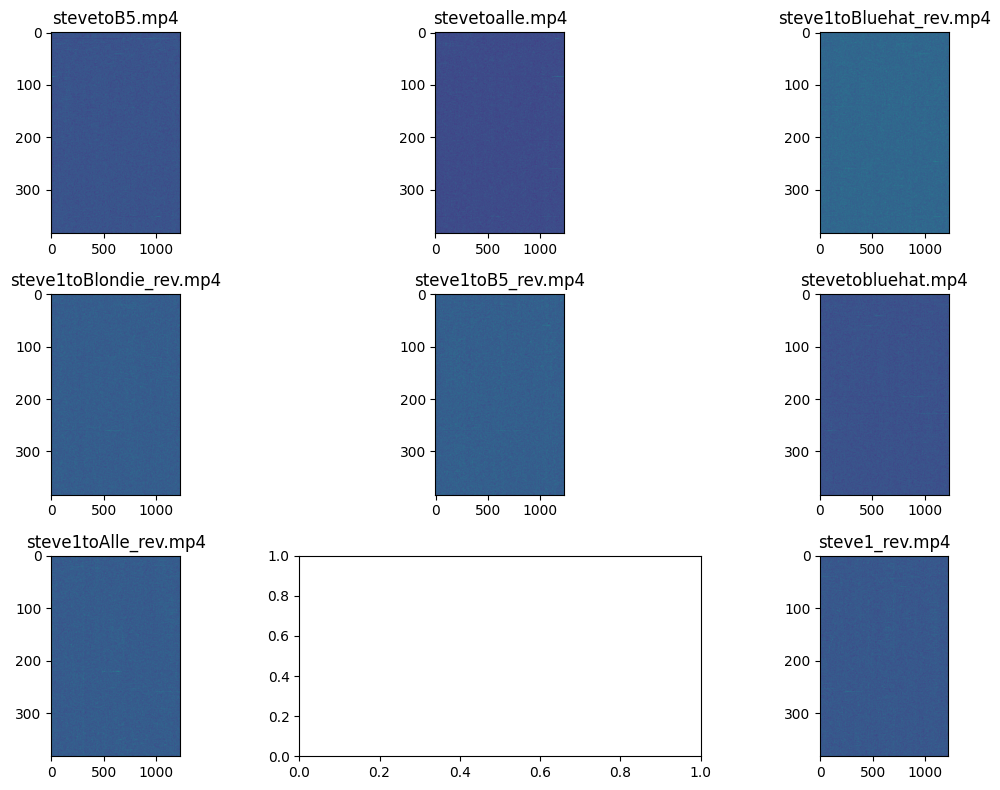

In [14]:
# plots the average data
counter = 0
n_plots = len(stimuli_names)
n_cols = int(np.ceil(np.sqrt(n_plots)))
n_rows = int(np.ceil(n_plots / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
axes_flat = axes.ravel()
for i, s in enumerate(stimuli_names):
    if data[s].shape[0] != 0:
        axes_flat[i].imshow(zscore(data[s][:,:,0], axis=1), aspect=5)
        axes_flat[i].set_title(s)
plt.tight_layout()  # automatically adjusts spacing
plt.show()

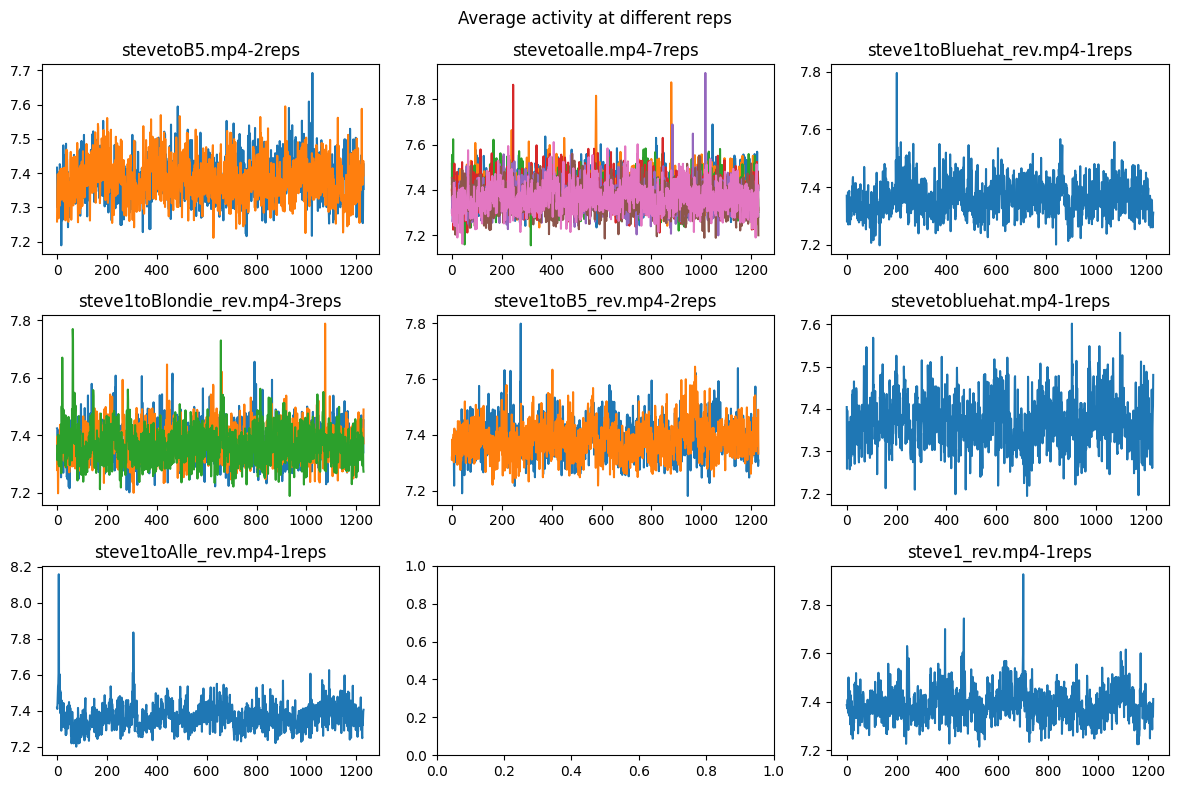

In [15]:
# plots the average data
counter = 0
n_plots = len(stimuli_names)
n_cols = int(np.ceil(np.sqrt(n_plots)))
n_rows = int(np.ceil(n_plots / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
axes_flat = axes.ravel()
for i, s in enumerate(stimuli_names):
    if data[s].shape != (0,):
        n_repetitions = data[s].shape[2]
        avg_units = np.mean(data[s], axis=0)
        axes_flat[i].plot(avg_units)
        axes_flat[i].set_title(f"{s}-{n_repetitions}reps")
plt.suptitle("Average activity at different reps")
plt.tight_layout()  # automatically adjusts spacing
plt.show()


(1230, 2)
(1232, 7)
(1231, 1)
(1230, 3)
(1230, 2)
(1230, 1)
(1230, 1)
(1220, 1)


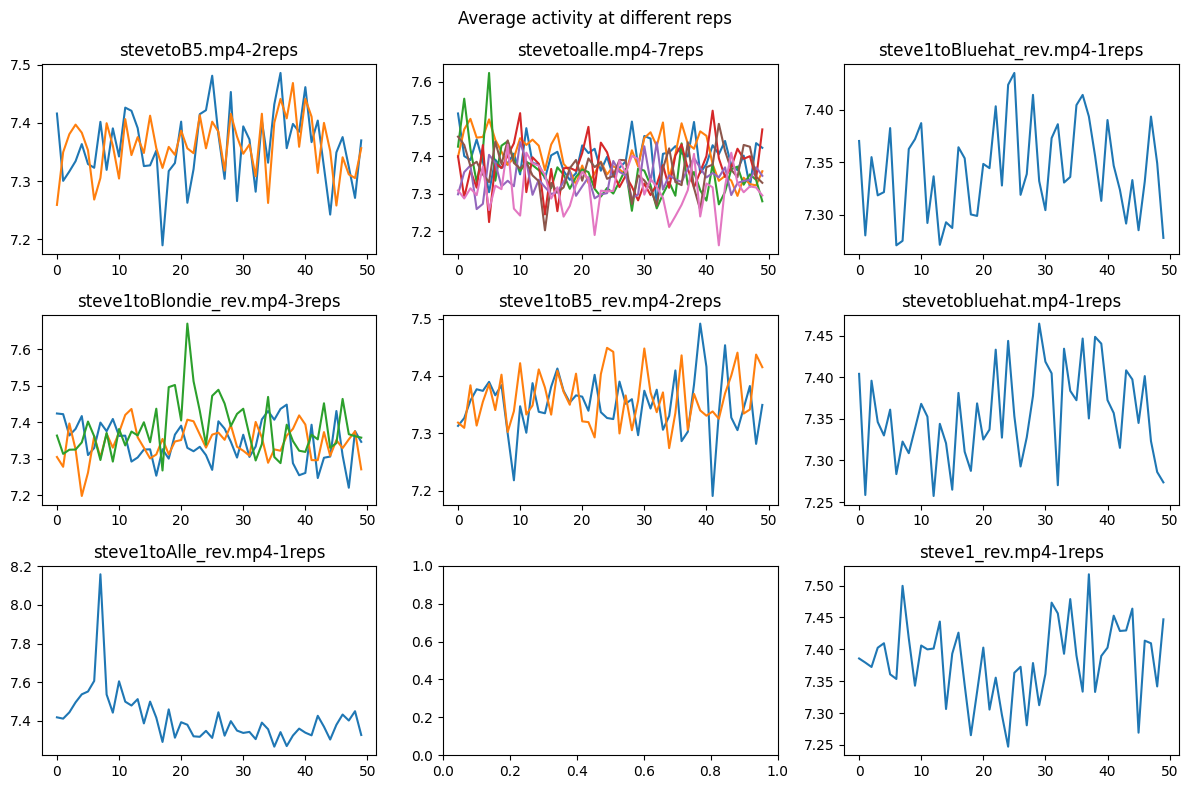

In [16]:
# plots the average data
counter = 0
n_plots = len(stimuli_names)
n_cols = int(np.ceil(np.sqrt(n_plots)))
n_rows = int(np.ceil(n_plots / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
axes_flat = axes.ravel()
for i, s in enumerate(stimuli_names):
    if data[s].shape != (0,):
        n_repetitions = data[s].shape[2]
        avg_units = np.mean(data[s], axis=0)
        print(avg_units.shape)
        axes_flat[i].plot(avg_units[:50, :])
        axes_flat[i].set_title(f"{s}-{n_repetitions}reps")
plt.suptitle("Average activity at different reps")
plt.tight_layout()  # automatically adjusts spacing
plt.show()


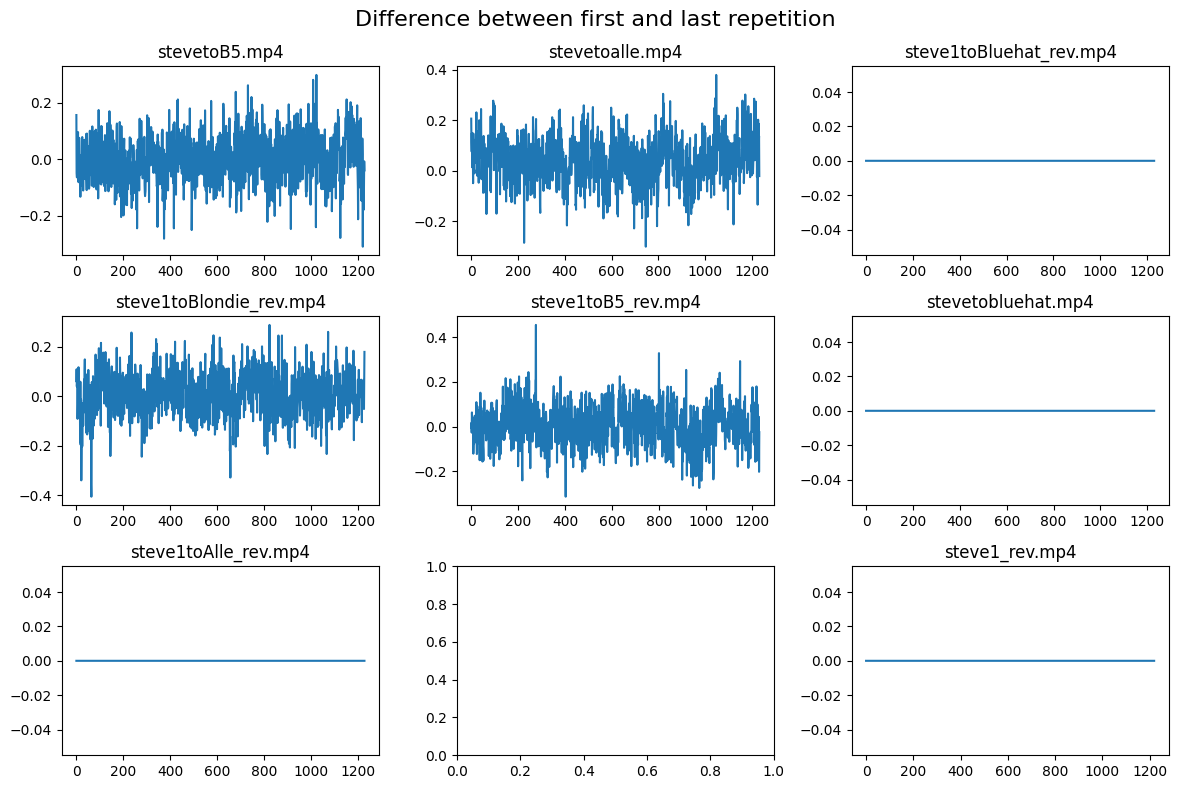

In [17]:
counter = 0
n_plots = len(stimuli_names)
n_cols = int(np.ceil(np.sqrt(n_plots)))
n_rows = int(np.ceil(n_plots / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
axes_flat = axes.ravel()
for i,s in enumerate(stimuli_names):
    if data[s].shape != (0,):
        n_repetitions = data[s].shape[2]
        avg_units = np.mean(data[s], axis=0)
        first_vs_last = avg_units[:,0] - avg_units[:,-1]
        axes_flat[i].plot(first_vs_last)
        axes_flat[i].set_title(s)
        counter += 1
fig.suptitle("Difference between first and last repetition", fontsize=16)
plt.tight_layout()  # automatically adjusts spacing
plt.show()

In [18]:
print("first vs last repetition correlation of the average time series")
for s in stimuli_names:
    if data[s].shape != (0,):
        n_repetitions = data[s].shape[2]
        avg_units = np.mean(data[s], axis=0)
        corrfirst_vs_last = np.corrcoef(avg_units[:,0], avg_units[:,-1])
        print(s, np.round(corrfirst_vs_last[0,1], 2), f"with {n_repetitions} reps")

first vs last repetition correlation of the average time series
stevetoB5.mp4 0.01 with 2 reps
stevetoalle.mp4 -0.05 with 7 reps
steve1toBluehat_rev.mp4 1.0 with 1 reps
steve1toBlondie_rev.mp4 -0.01 with 3 reps
steve1toB5_rev.mp4 -0.0 with 2 reps
stevetobluehat.mp4 1.0 with 1 reps
steve1toAlle_rev.mp4 1.0 with 1 reps
steve1_rev.mp4 1.0 with 1 reps


In [19]:
mat = autocorr_mat(data[s][:,:,0], data2=data[s][:,:,-1])
lp = get_lagplot(mat, max_lag=200, min_datapts=100)

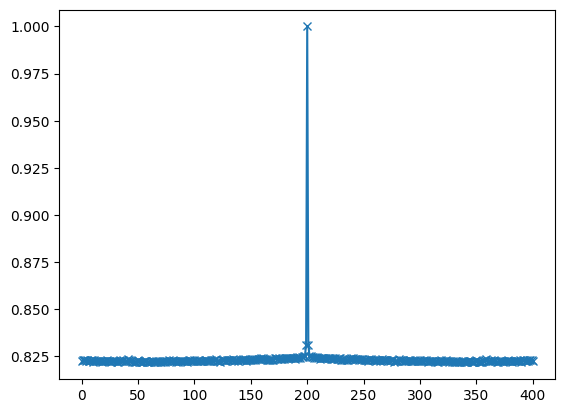

In [20]:
plt.plot(lp, marker="x")

In [21]:
# create 200-length integer array with zero at the middle (index 100)
center_zero_array = np.arange(-100, 101, dtype=int)
assert center_zero_array.size == 201 and center_zero_array[100] == 0


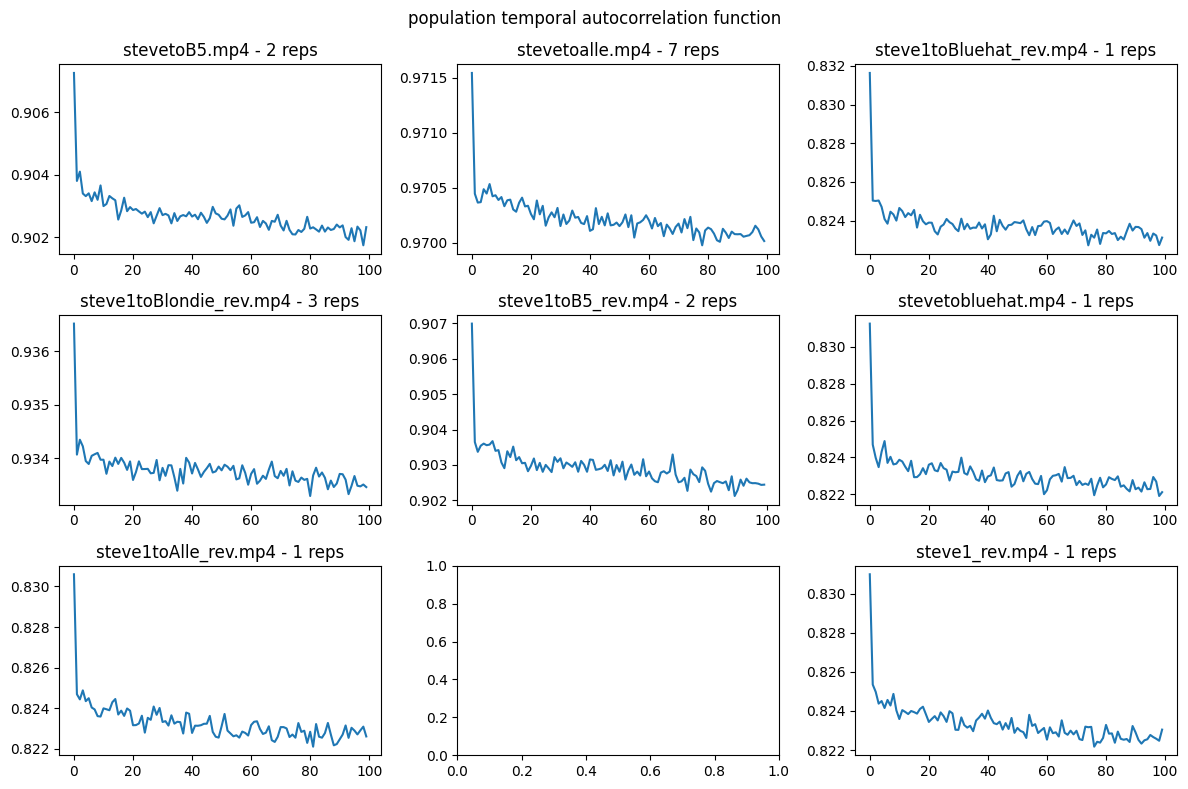

In [22]:
counter = 0
n_plots = len(stimuli_names)
n_cols = int(np.ceil(np.sqrt(n_plots)))
n_rows = int(np.ceil(n_plots / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
axes_flat = axes.ravel()
for i,s in enumerate(stimuli_names):
    if data[s].shape != (0,):
        n_repetitions = data[s].shape[2]
        avg_reps = np.mean(data[s], axis=2)
        first_vs_last_mat = autocorr_mat(avg_reps)
        lp_1st_vs_last = get_lagplot(first_vs_last_mat, max_lag=100, min_datapts=100, symmetric=True)
        #axes_flat[i].plot(idx_max, lp_1st_vs_last[idx_max], 'ro', markersize=4)
        axes_flat[i].plot(lp_1st_vs_last[1:])
        axes_flat[i].set_title(f"{s} - {n_repetitions} reps")
        counter += 1
plt.suptitle("population temporal autocorrelation function")
plt.tight_layout()  # automatically adjusts spacing
plt.show()

stevetoB5.mp4 90 0.8201138488406984
stevetoalle.mp4 12 0.8164587516063794
steve1toBluehat_rev.mp4 100 1.0
steve1toBlondie_rev.mp4 188 0.8217669685986838
steve1toB5_rev.mp4 31 0.8201359542763917
stevetobluehat.mp4 100 1.0
steve1toAlle_rev.mp4 100 1.0
steve1_rev.mp4 100 1.0


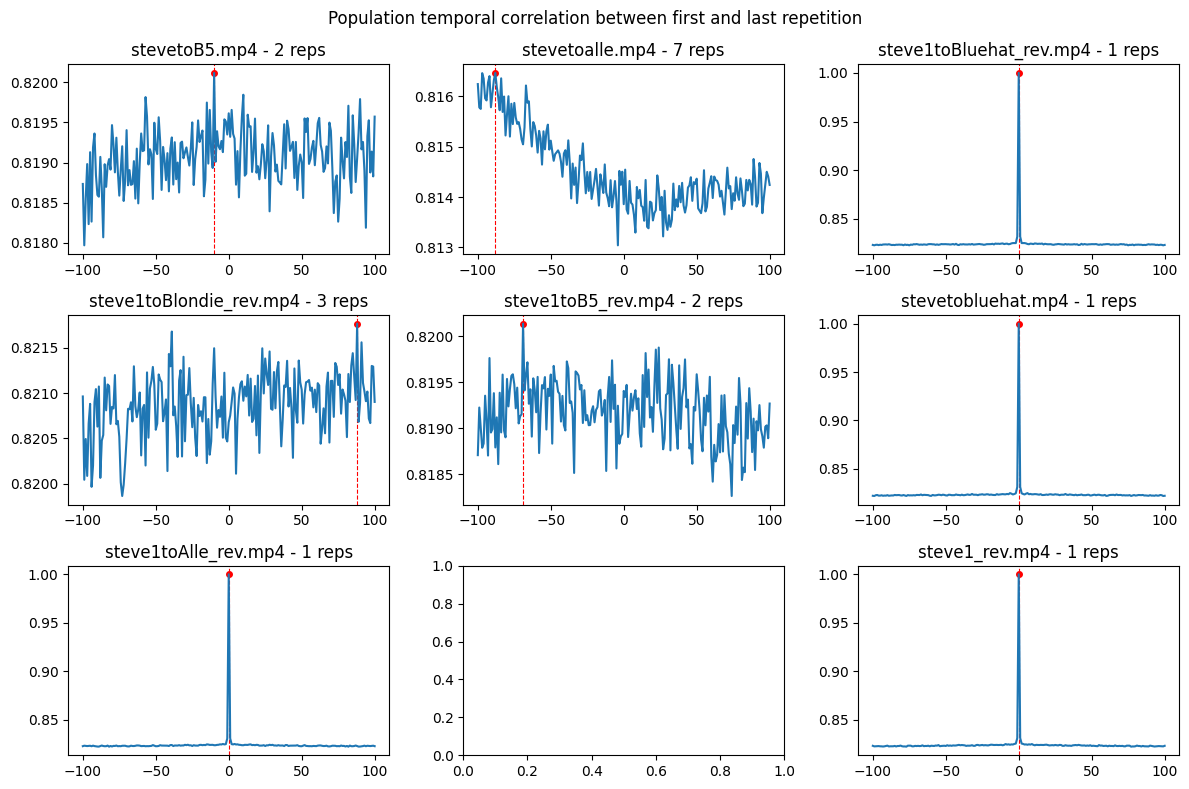

In [23]:
counter = 0
max_lag = 100
center_zero_array = np.arange(-max_lag, max_lag+1)
n_plots = len(stimuli_names)
n_cols = int(np.ceil(np.sqrt(n_plots)))
n_rows = int(np.ceil(n_plots / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
axes_flat = axes.ravel()
for i,s in enumerate(stimuli_names):
    if data[s].shape != (0,):
        n_repetitions = data[s].shape[2]
        first_vs_last_mat = autocorr_mat(data[s][:,:,0], data2=data[s][:,:,-1])
        lp_1st_vs_last = get_lagplot(first_vs_last_mat, max_lag=100, min_datapts=100)
        idx_max = int(np.nanargmax(lp_1st_vs_last))
        print(s, idx_max, lp_1st_vs_last[idx_max])
        axes_flat[i].axvline(center_zero_array[idx_max], color='r', linestyle='--', linewidth=0.8)
        axes_flat[i].plot(center_zero_array[idx_max], lp_1st_vs_last[idx_max], 'ro', markersize=4)
        axes_flat[i].plot(center_zero_array,lp_1st_vs_last)
        axes_flat[i].set_title(f"{s} - {n_repetitions} reps")
        counter += 1
plt.suptitle("Population temporal correlation between first and last repetition")
plt.tight_layout()  # automatically adjusts spacing
plt.show()

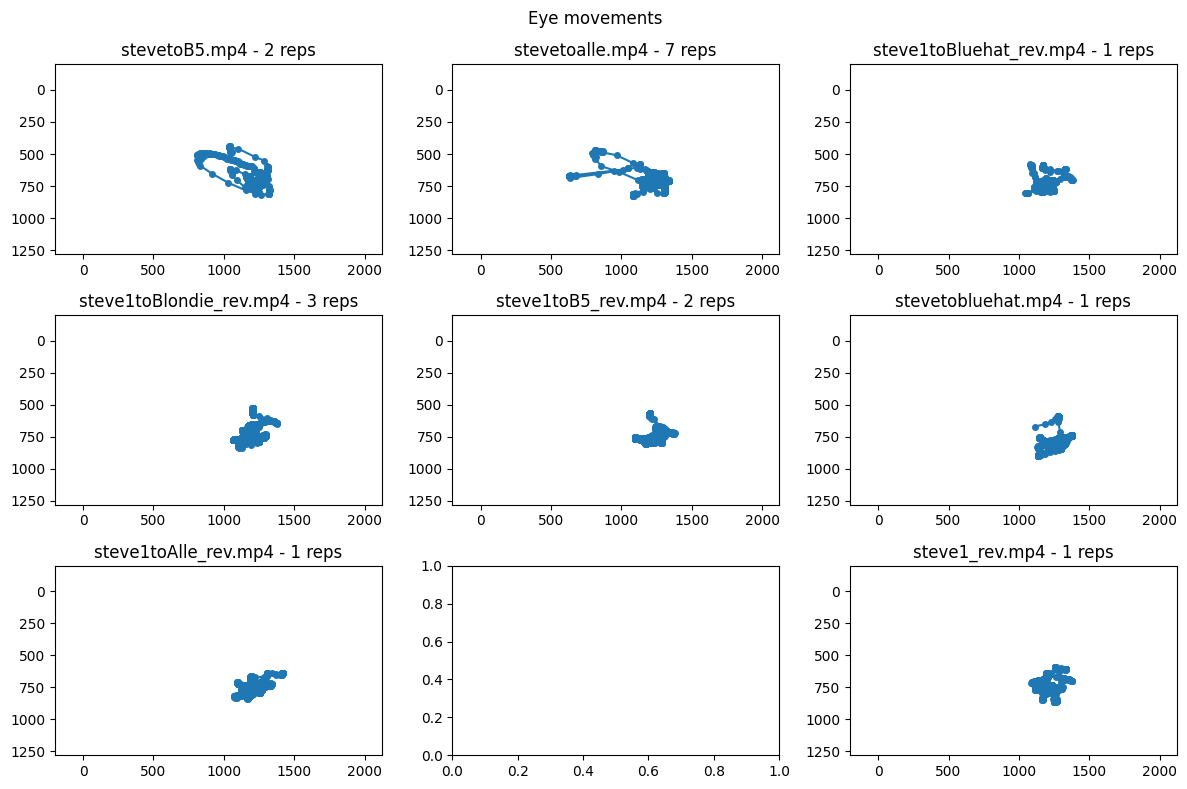

In [24]:
counter = 0
max_lag = 100
center_zero_array = np.arange(-max_lag, max_lag+1)
n_plots = len(stimuli_names)
n_cols = int(np.ceil(np.sqrt(n_plots)))
n_rows = int(np.ceil(n_plots / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
axes_flat = axes.ravel()
for i,s in enumerate(stimuli_names):
    if data[s].shape != (0,):
        n_repetitions = data[s].shape[2]
        axes_flat[i].plot(gaze_data[s][0,:,0], gaze_data[s][1,:,0], marker="o", markersize=4)
        axes_flat[i].set_xlim(-200, 2120)
        axes_flat[i].set_ylim(-200, 1280)
        axes_flat[i].invert_yaxis()
        axes_flat[i].set_title(f"{s} - {n_repetitions} reps")
        counter += 1
plt.suptitle("Eye movements")
plt.tight_layout()  # automatically adjusts spacing
plt.show()


In [25]:
data.keys()

dict_keys(['stevetoB5.mp4', 'stevetoalle.mp4', 'steve1toBluehat_rev.mp4', 'steve1toBlondie_rev.mp4', 'steve1toB5_rev.mp4', 'stevetobluehat.mp4', 'steve1toAlle_rev.mp4', 'stevetoblondie.mp4', 'steve1_rev.mp4'])

In [26]:
stim_idx = 2
video = read_video(paths, 1, stimuli_names[stim_idx])

15:51:39 - rank 1 steve1toBluehat_rev.mp4 read successfully


KeyboardInterrupt: 

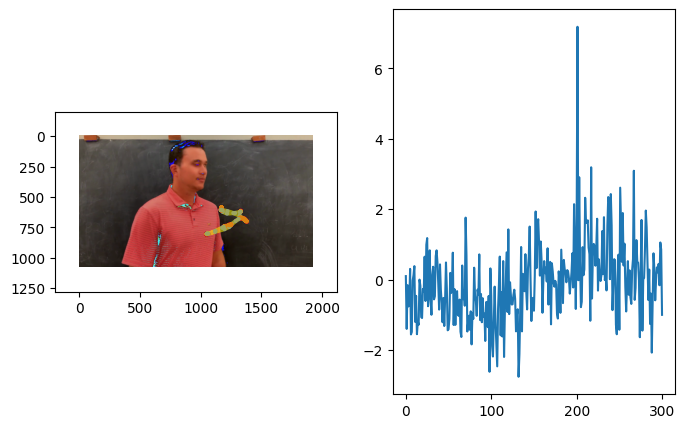

In [27]:
eyes = gaze_data[stimuli_names[stim_idx]][:,:,0]
neural = zscore(np.mean(data[stimuli_names[stim_idx]][:,:,0], axis=0))
foreperiod_len = round(300 / (1000/resolution_Hz))
for i in range(0, foreperiod_len):
    fig, ax = plt.subplots(1, 2, figsize=(8, 5))  # create a figure and axes
    ax[0].plot(eyes[0, :i], eyes[1, :i], color='yellow', linewidth=3, alpha=0.5)
    sc = ax[0].scatter(
        eyes[0, :i], eyes[1, :i],
        c=eyes[2, :i], cmap='coolwarm', s=10, edgecolors='none'
    )
    ax[0].set_xlim(-200, 2120)
    ax[0].set_ylim(-200, 1280)
    ax[0].invert_yaxis()
    ax[1].plot(neural[:i])
    plt.pause(0.01)
    plt.close(fig)  # now this works
    clear_output(wait=True)

for i in range(foreperiod_len, eyes.shape[1]):
    fig, ax = plt.subplots(1, 2, figsize=(8, 5))  # create a figure and axes
    ax[0].plot(eyes[0, :i], eyes[1, :i], color='yellow', linewidth=3, alpha=0.5)
    sc = ax[0].scatter(
        eyes[0, :i], eyes[1, :i],
        c=eyes[2, :i], cmap='coolwarm', s=10, edgecolors='none'
    )
    ax[0].set_xlim(-200, 2120)
    ax[0].set_ylim(-200, 1280)
    ax[0].invert_yaxis()
    ax[1].plot(neural[:i])
    ax[0].imshow(video[int(i//3.3)]-foreperiod_len)
    plt.pause(0.001)
    plt.close(fig)  # now this works
    clear_output(wait=True)